In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

# load the dataset

In [ ]:
# load the dataset
df = pd.read_csv(r"C:\Users\Admin\Dropbox\Copy of zomato.csv")
print(f'Dataset shape: {df.shape}')
df.head(2)

Dataset shape: (51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
feature_na =[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

# % of missing values

In [ ]:
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [ ]:
# Making a copy of the dataset to work on
data = df.copy()

## Lets aggregate data of listed_in(type) into list

In [ ]:
grouped=data.groupby(["name","address"]).agg({"listed_in(type)" : list})

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## merge your both the dataframe

In [ ]:
newdata = pd.merge(grouped, data, on =(["name", "address"]))

In [ ]:
newdata.columns

Index(['name', 'address', 'listed_in(type)_x', 'url', 'online_order',
       'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)_y', 'listed_in(city)'],
      dtype='object')

In [ ]:
newdata['listed_in(type)_y'].dtype

dtype('O')

In [ ]:
newdata.shape

(51717, 18)

# dropping duplicates

In [ ]:
newdata.drop_duplicates(subset = ["name", "address", "listed_in(type)_y"], inplace = True)

In [ ]:
newdata.shape

(20915, 18)

In [ ]:
newdata.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city)
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Bellandur
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,BTM
3,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,BTM
11,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Buffet,Electronic City
12,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Delivery,Electronic City


In [ ]:
# resetting your index
newdata = newdata.reset_index(drop=True)

In [ ]:
newdata.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city)
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Bellandur
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,BTM
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,BTM
3,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Buffet,Electronic City
4,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Delivery,Electronic City


In [ ]:
newdata.shape

(20915, 18)

In [ ]:
newdata['rate'].unique()

array(['3.4/5', '3.9/5', nan, '3.7/5', '3.2/5', '3.5/5', '4.6/5', '4.1/5',
       '4.2 /5', '4.3 /5', '4.2/5', '4.0/5', '4.0 /5', '3.9 /5', '4.1 /5',
       '3.7 /5', '4.3/5', '3.1 /5', '3.6/5', '3.1/5', '3.3/5', '3.0/5',
       '3.5 /5', '4.4/5', '4.5 /5', 'NEW', '3.3 /5', '3.8/5', '3.2 /5',
       '3.6 /5', '4.5/5', '3.8 /5', '3.4 /5', '2.7/5', '2.7 /5', '2.8/5',
       '3.0 /5', '2.9/5', '2.5 /5', '2.9 /5', '2.8 /5', '4.9/5', '4.7/5',
       '4.8/5', '4.8 /5', '4.4 /5', '1.8/5', '2.4/5', '2.1/5', '2.5/5',
       '-', '2.2/5', '4.7 /5', '2.6/5', '4.6 /5', '4.9 /5', '2.3/5',
       '2.0 /5', '2.3 /5', '2.6 /5', '2.4 /5', '2.0/5'], dtype=object)

In [ ]:
newdata['rate'].dtype

dtype('O')

# Transforming the ratings column 


In [ ]:
newdata["rating"] = newdata["rate"].str[:3] # Extracting the first three characters of each string in "rate"

In [ ]:
newdata["rating"].replace("NEW",0,inplace=True)
newdata["rating"].replace("-",0,inplace=True)

# Converting ratings to a numeric column so we can discretize it

In [ ]:
newdata["rating"]= pd.to_numeric(newdata["rating"])

In [ ]:
# Discretizing the ratings into a categorical feature with 4 levels
## ie if less than 3, assign 0
## ie if less than 3.5, assign 1
## ie if less than 4.0, assign 2
## ie if less than 5.o assign 3

## We can think of these as 0-Very Low, 1-Low, 2-Medium and 3-High.

In [ ]:
newdata["rating"].head()

0    3.4
1    3.9
2    3.9
3    NaN
4    NaN
Name: rating, dtype: float64

In [ ]:
newdata['rating'].unique()

array([3.4, 3.9, nan, 3.7, 3.2, 3.5, 4.6, 4.1, 4.2, 4.3, 4. , 3.1, 3.6,
       3.3, 3. , 4.4, 4.5, 0. , 3.8, 2.7, 2.8, 2.9, 2.5, 4.9, 4.7, 4.8,
       1.8, 2.4, 2.1, 2.2, 2.6, 2.3, 2. ])

In [ ]:
newdata.isnull().sum()

name                               0
address                            0
listed_in(type)_x                  0
url                                0
online_order                       0
book_table                         0
rate                            3383
votes                              0
phone                            399
location                          12
rest_type                        106
dish_liked                     11999
cuisines                          23
approx_cost(for two people)       98
reviews_list                       0
menu_item                          0
listed_in(type)_y                  0
listed_in(city)                    0
rating                          3383
dtype: int64

In [ ]:
newdata.shape

(20915, 19)

In [ ]:
## bins = [1, 3.25, 4.1, 5.0]
## it means if it is b/w 1 to 3.25, assign label as 0
## if b/w 3.25 to 4.1, assign label as 1 & so on------

newdata["rating"]=pd.cut(newdata["rating"], bins = [1, 3.25, 4.1, 5.0], labels = ["0", "1", "2"])

<AxesSubplot:xlabel='rating', ylabel='count'>

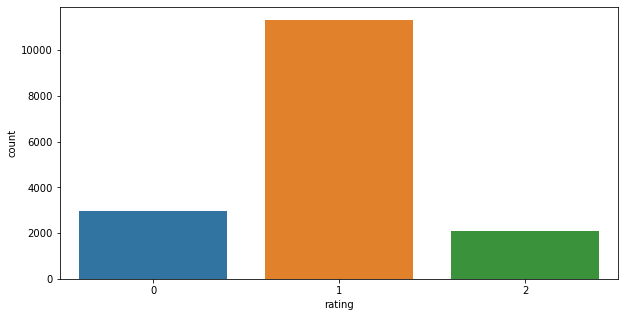

In [ ]:
# Visualizing the rating class distribution
plt.figure(figsize = (10, 5))
sns.countplot(newdata["rating"])


In [ ]:
# Summary statistics
newdata.describe(include = "all")

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city),rating
count,20915,20915,20915,20915,20915,20915,17532,20915.000000,20516,20903,20809,8916,20892,20817,20915,20915,20915,20915,16391
unique,8792,11495,927,20915,2,2,61,NaN,11999,93,93,4502,2630,70,12660,3693,7,30,3
top,Cafe Coffee Day,Delivery Only,"[Delivery, Dine-out]",https://www.zomato.com/bangalore/punjabites-hs...,Yes,No,3.9/5,NaN,080 43334333,Whitefield,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM,1
freq,78,36,2418,1,11605,18615,1181,NaN,93,1462,8007,78,1174,3005,3524,16766,9355,2379,11321
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.105427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.954538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
newdata['reviews_list'][0]

'[(\'Rated 5.0\', "RATED\\n  Had an egg chicken roll and a paneer roll... Really yummy... A must visit place... It would be good if you guys can keep the shop open on Sunday\'s as well.. Good luck... :-)"), (\'Rated 5.0\', \'RATED\\n  Not just the Roll but the filling tastes great. I would highly recommend to others to try their rolls. Owners hospitality is also good and very friendly.\'), (\'Rated 4.5\', \'RATED\\n  Very nice place complete value for money ? Highly recommend.Must visit for any foodie . I would recommend the egg chicken roll . #feeltheroll\'), (\'Rated 5.0\', \'RATED\\n  Had an amazing mouth-watering ?chicken roll?Worth every bite..A must try for every foodie?A variety of rolls and sandwiches are available as well .. A budding rafflesia ?\')]'

In [ ]:
rev = newdata['reviews_list'][0].lower()
rev

'[(\'rated 5.0\', "rated\\n  had an egg chicken roll and a paneer roll... really yummy... a must visit place... it would be good if you guys can keep the shop open on sunday\'s as well.. good luck... :-)"), (\'rated 5.0\', \'rated\\n  not just the roll but the filling tastes great. i would highly recommend to others to try their rolls. owners hospitality is also good and very friendly.\'), (\'rated 4.5\', \'rated\\n  very nice place complete value for money ? highly recommend.must visit for any foodie . i would recommend the egg chicken roll . #feeltheroll\'), (\'rated 5.0\', \'rated\\n  had an amazing mouth-watering ?chicken roll?worth every bite..a must try for every foodie?a variety of rolls and sandwiches are available as well .. a budding rafflesia ?\')]'

In [ ]:
import re
rev2 = re.sub('[^a-zA-Z]', ' ',rev)
rev2

'   rated        rated n  had an egg chicken roll and a paneer roll    really yummy    a must visit place    it would be good if you guys can keep the shop open on sunday s as well   good luck             rated        rated n  not just the roll but the filling tastes great  i would highly recommend to others to try their rolls  owners hospitality is also good and very friendly       rated        rated n  very nice place complete value for money   highly recommend must visit for any foodie   i would recommend the egg chicken roll    feeltheroll      rated        rated n  had an amazing mouth watering  chicken roll worth every bite  a must try for every foodie a variety of rolls and sandwiches are available as well    a budding rafflesia     '

In [ ]:
rev3=re.sub('rated', ' ',rev2)
rev3

'              n  had an egg chicken roll and a paneer roll    really yummy    a must visit place    it would be good if you guys can keep the shop open on sunday s as well   good luck                        n  not just the roll but the filling tastes great  i would highly recommend to others to try their rolls  owners hospitality is also good and very friendly                  n  very nice place complete value for money   highly recommend must visit for any foodie   i would recommend the egg chicken roll    feeltheroll                 n  had an amazing mouth watering  chicken roll worth every bite  a must try for every foodie a variety of rolls and sandwiches are available as well    a budding rafflesia     '

In [ ]:
rev4=re.sub('x',' ',rev3)
rev4

'              n  had an egg chicken roll and a paneer roll    really yummy    a must visit place    it would be good if you guys can keep the shop open on sunday s as well   good luck                        n  not just the roll but the filling tastes great  i would highly recommend to others to try their rolls  owners hospitality is also good and very friendly                  n  very nice place complete value for money   highly recommend must visit for any foodie   i would recommend the egg chicken roll    feeltheroll                 n  had an amazing mouth watering  chicken roll worth every bite  a must try for every foodie a variety of rolls and sandwiches are available as well    a budding rafflesia     '

    remove multiple spaces

In [ ]:
rev5=re.sub(' +',' ',rev4)
rev5

' n had an egg chicken roll and a paneer roll really yummy a must visit place it would be good if you guys can keep the shop open on sunday s as well good luck n not just the roll but the filling tastes great i would highly recommend to others to try their rolls owners hospitality is also good and very friendly n very nice place complete value for money highly recommend must visit for any foodie i would recommend the egg chicken roll feeltheroll n had an amazing mouth watering chicken roll worth every bite a must try for every foodie a variety of rolls and sandwiches are available as well a budding rafflesia '

In [ ]:
newdata.shape

(20915, 19)

In [ ]:
sample = newdata.sample(n=2000)

In [ ]:
total_review = ' '
for review in sample['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-Z]', ' ',review)
    review=re.sub('rated', ' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review + str(review)

## generate wordcloud

In [ ]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS

In [ ]:
stopwords=set(STOPWORDS)

(-0.5, 799.5, 799.5, -0.5)

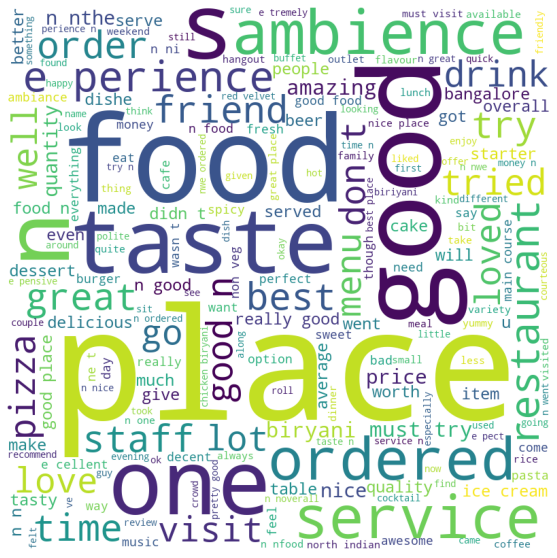

In [ ]:
wordcloud = WordCloud(width= 800, height= 800,
                background_color='white',
                stopwords=stopwords,
                min_font_size= 10).generate(total_review)
#plot the WordCloud Image
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")

    Observations
    Of the 50 most frequent words across customer reviews, best are: place,food,taste,ambience,good..
    The only negative word in the top 50 is "bad".

In [ ]:
from nltk.corpus import RegexpTokenizer as regextoken

In [ ]:
# Converting all the text to lowercase

newdata['reviews_list'] = newdata['reviews_list'].apply(lambda x: x.lower())
 
#another method for converting lowercase

'''
def apply_lower(x):
    return x.lower()
 newdata["reviews_list"] = newdata["reviews_list"].apply(apply_lower)
   

'''

'\ndef apply_lower(x):\n    return x.lower()\n newdata["reviews_list"] = newdata["reviews_list"].apply(apply_lower)\n   \n\n'

In [ ]:
##  Creating a regular expression tokenizer that have only alphabets , ie it remove all the special characters


tokenizer = regextoken("[a-zA-Z]+") 

In [ ]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [ ]:
newdata["reviews_list"][0]

'[(\'rated 5.0\', "rated\\n  had an egg chicken roll and a paneer roll... really yummy... a must visit place... it would be good if you guys can keep the shop open on sunday\'s as well.. good luck... :-)"), (\'rated 5.0\', \'rated\\n  not just the roll but the filling tastes great. i would highly recommend to others to try their rolls. owners hospitality is also good and very friendly.\'), (\'rated 4.5\', \'rated\\n  very nice place complete value for money ? highly recommend.must visit for any foodie . i would recommend the egg chicken roll . #feeltheroll\'), (\'rated 5.0\', \'rated\\n  had an amazing mouth-watering ?chicken roll?worth every bite..a must try for every foodie?a variety of rolls and sandwiches are available as well .. a budding rafflesia ?\')]'

In [ ]:
## tokenize data of very first review
print(tokenizer.tokenize(newdata["reviews_list"][0]))

['rated', 'rated', 'n', 'had', 'an', 'egg', 'chicken', 'roll', 'and', 'a', 'paneer', 'roll', 'really', 'yummy', 'a', 'must', 'visit', 'place', 'it', 'would', 'be', 'good', 'if', 'you', 'guys', 'can', 'keep', 'the', 'shop', 'open', 'on', 'sunday', 's', 'as', 'well', 'good', 'luck', 'rated', 'rated', 'n', 'not', 'just', 'the', 'roll', 'but', 'the', 'filling', 'tastes', 'great', 'i', 'would', 'highly', 'recommend', 'to', 'others', 'to', 'try', 'their', 'rolls', 'owners', 'hospitality', 'is', 'also', 'good', 'and', 'very', 'friendly', 'rated', 'rated', 'n', 'very', 'nice', 'place', 'complete', 'value', 'for', 'money', 'highly', 'recommend', 'must', 'visit', 'for', 'any', 'foodie', 'i', 'would', 'recommend', 'the', 'egg', 'chicken', 'roll', 'feeltheroll', 'rated', 'rated', 'n', 'had', 'an', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'a', 'must', 'try', 'for', 'every', 'foodie', 'a', 'variety', 'of', 'rolls', 'and', 'sandwiches', 'are', 'available', 'as', 'w

In [ ]:
# Applying the tokenizer to each row of the reviews
review_tokens = newdata["reviews_list"].apply(tokenizer.tokenize)

In [ ]:
# Examining the tokens created for the first row / restaurant
print(review_tokens[0])

['rated', 'rated', 'n', 'had', 'an', 'egg', 'chicken', 'roll', 'and', 'a', 'paneer', 'roll', 'really', 'yummy', 'a', 'must', 'visit', 'place', 'it', 'would', 'be', 'good', 'if', 'you', 'guys', 'can', 'keep', 'the', 'shop', 'open', 'on', 'sunday', 's', 'as', 'well', 'good', 'luck', 'rated', 'rated', 'n', 'not', 'just', 'the', 'roll', 'but', 'the', 'filling', 'tastes', 'great', 'i', 'would', 'highly', 'recommend', 'to', 'others', 'to', 'try', 'their', 'rolls', 'owners', 'hospitality', 'is', 'also', 'good', 'and', 'very', 'friendly', 'rated', 'rated', 'n', 'very', 'nice', 'place', 'complete', 'value', 'for', 'money', 'highly', 'recommend', 'must', 'visit', 'for', 'any', 'foodie', 'i', 'would', 'recommend', 'the', 'egg', 'chicken', 'roll', 'feeltheroll', 'rated', 'rated', 'n', 'had', 'an', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'a', 'must', 'try', 'for', 'every', 'foodie', 'a', 'variety', 'of', 'rolls', 'and', 'sandwiches', 'are', 'available', 'as', 'w

### now from this above list,we will figure out we have some stopwords, it means we have to remove these stopwords like an,and,it etc

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop = stopwords.words("english")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### we will figure out there are some more stopwords in my data, that we can add it to my stop list

In [ ]:
# Adding custom words to stopwords 
stop.extend(["rated", "n", "nan", "x"])

In [ ]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
### with respect to very first row, how to remove stopwords
rev=review_tokens[0]
print(rev)

['rated', 'rated', 'n', 'had', 'an', 'egg', 'chicken', 'roll', 'and', 'a', 'paneer', 'roll', 'really', 'yummy', 'a', 'must', 'visit', 'place', 'it', 'would', 'be', 'good', 'if', 'you', 'guys', 'can', 'keep', 'the', 'shop', 'open', 'on', 'sunday', 's', 'as', 'well', 'good', 'luck', 'rated', 'rated', 'n', 'not', 'just', 'the', 'roll', 'but', 'the', 'filling', 'tastes', 'great', 'i', 'would', 'highly', 'recommend', 'to', 'others', 'to', 'try', 'their', 'rolls', 'owners', 'hospitality', 'is', 'also', 'good', 'and', 'very', 'friendly', 'rated', 'rated', 'n', 'very', 'nice', 'place', 'complete', 'value', 'for', 'money', 'highly', 'recommend', 'must', 'visit', 'for', 'any', 'foodie', 'i', 'would', 'recommend', 'the', 'egg', 'chicken', 'roll', 'feeltheroll', 'rated', 'rated', 'n', 'had', 'an', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'a', 'must', 'try', 'for', 'every', 'foodie', 'a', 'variety', 'of', 'rolls', 'and', 'sandwiches', 'are', 'available', 'as', 'w

In [ ]:
print([token for token in rev if token not in stop])

['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'rolls', 'owners', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'rolls', 'sandwiches', 'available', 'well', 'budding', 'rafflesia']


In [ ]:
### using function

In [ ]:
def remove_stopwords(text):
    updated_text = [token for token in text if token not in stop]
    return updated_text

In [168]:
review_tokens=review_tokens.apply(remove_stopwords)

In [169]:
type(review_tokens)

pandas.core.series.Series

In [170]:
print(review_tokens[0])

['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'rolls', 'owners', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'rolls', 'sandwiches', 'available', 'well', 'budding', 'rafflesia']


In [171]:
print(review_tokens[1])

['little', 'cafe', 'set', 'beautiful', 'location', 'ambiance', 'good', 'nthe', 'burger', 'filled', 'taste', 'chicken', 'nthe', 'banana', 'chocolate', 'sandwich', 'variety', 'would', 'never', 'find', 'restaurants', 'bangalore', 'drinks', 'wonderful', 'lot', 'flavours', 'choose', 'nit', 'took', 'little', 'time', 'expected', 'food', 'served', 'table', 'nall', 'dishes', 'seemed', 'priced', 'moderately', 'well', 'nfood', 'nambiance', 'nservice', 'ntheir', 'chefs', 'brilliant', 'job', 'creating', 'new', 'dishes', 'variety', 'na', 'wonderful', 'place', 'friends', 'cozy', 'cafe', 'near', 'silk', 'board', 'came', 'boarding', 'bus', 'totally', 'open', 'air', 'especially', 'comfortable', 'night', 'staff', 'friendly', 'serve', 'food', 'fast', 'quite', 'cheap', 'good', 'bite', 'ncons', 'come', 'weather', 'good', 'toilets', 'lights', 'ni', 'recommend', 'beetroot', 'juice', 'nice', 'place', 'hang', 'open', 'space', 'must', 'visit', 'place', 'night', 'looks', 'awesome', 'food', 'items', 'tasty', 'frie

In [172]:
len(review_tokens)

20915

In [173]:
# Concatenating all the reviews as I have to count frequency of each word
all_reviews = review_tokens.astype(str).str.cat()

In [174]:
all_reviews[0:200]

"['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes'"

In [175]:
type(all_reviews)

str

In [176]:
len(all_reviews)

129341038

In [177]:
## perform tokenization to convert your string(all_reviews) into list,so that we will count frequency of words
cleaned_reviews = tokenizer.tokenize(all_reviews)

In [178]:
len(cleaned_reviews)

13376224

In [179]:
type(cleaned_reviews)

list

In [180]:
print(cleaned_reviews[0:200])

['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'rolls', 'owners', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'rolls', 'sandwiches', 'available', 'well', 'budding', 'rafflesia', 'little', 'cafe', 'set', 'beautiful', 'location', 'ambiance', 'good', 'nthe', 'burger', 'filled', 'taste', 'chicken', 'nthe', 'banana', 'chocolate', 'sandwich', 'variety', 'would', 'never', 'find', 'restaurants', 'bangalore', 'drinks', 'wonderful', 'lot', 'flavours', 'choose', 'nit', 'took', 'little', 'time', 'expected', 'food

# obtain the frequency of individual words in the reviews, for this u have to use FreqDist

In [181]:
from nltk import FreqDist, bigrams, trigrams

In [182]:
fd = FreqDist()

In [183]:
for word in cleaned_reviews:
    fd[word]=fd[word]+ 1

In [184]:
fd.most_common(5)

[('good', 328304),
 ('place', 317915),
 ('food', 307405),
 ('chicken', 141301),
 ('service', 109512)]

# Plotting the top 50 most frequent words

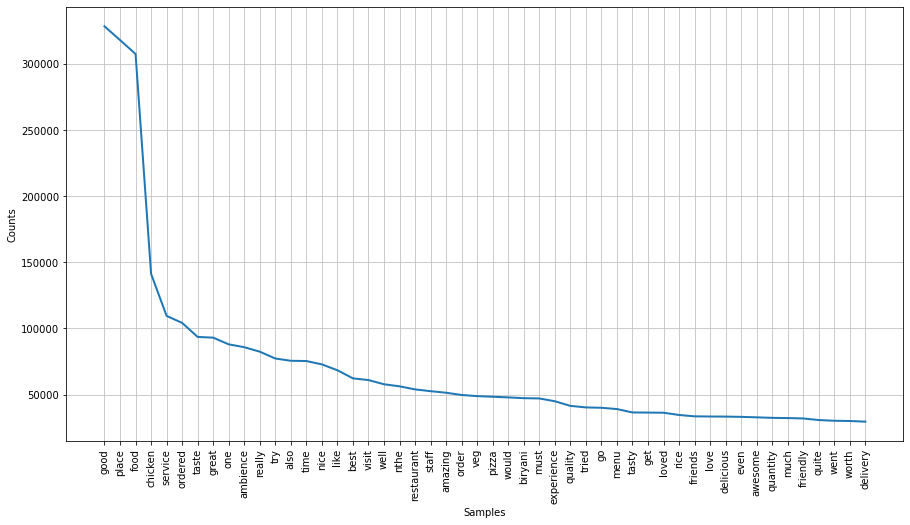

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [185]:
plt.figure(figsize= (15, 8))
fd.plot(50)

   Factors contributing to restaurant experience are mentioned in the following (descending) order of frequency:
   
   place > service > taste > ambience >time> staff > quality > menu  > quantity > friendly > delivery>.

### Bi-grams

In [186]:
##Now let us repeat the analysis on a bi-gram level. Bi-grams are pairs of words that provide better insights than individual words.

In [187]:
from nltk import bigrams

In [188]:
# Generating bigrams from the reviews
bigrams = bigrams(cleaned_reviews)

In [190]:
bigrams

<generator object bigrams at 0x000001C9E87C1E40>

In [191]:
# Getting the bigram frequency distribution
fd_bigrams = FreqDist()
for bigrams in bigrams:
    fd_bigrams[bigrams]=fd_bigrams[bigrams] + 1

# Examining the top 5 most frequent bigrams
fd_bigrams.most_common(5)


[(('must', 'try'), 23182),
 (('really', 'good'), 22564),
 (('good', 'food'), 21589),
 (('food', 'good'), 21175),
 (('good', 'place'), 18690)]

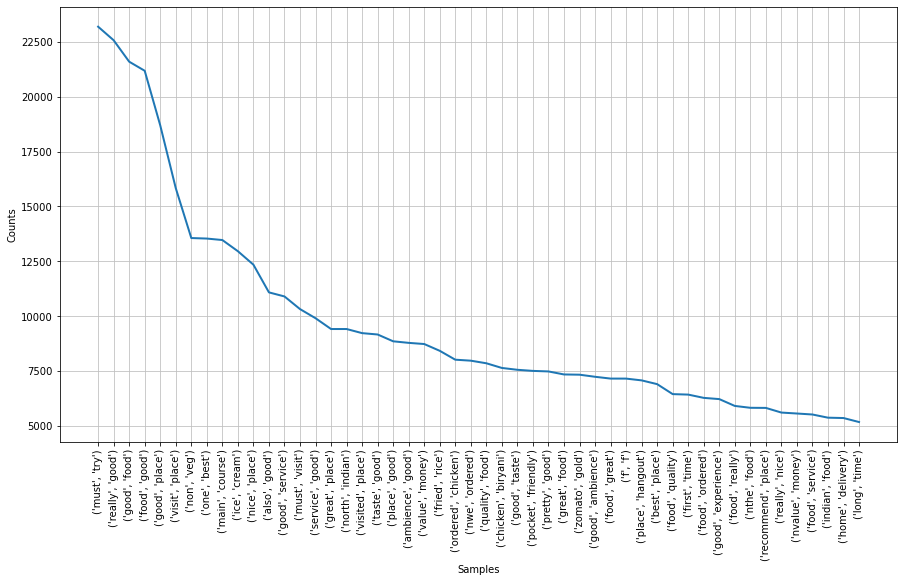

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [192]:
# Plotting the top 50 most frequent bigrams
plt.figure(figsize= (15, 8))
fd_bigrams.plot(50)

    Observations
    We have some new insights! Food items/preferences mentioned in the top 50 bigrams are non veg, ice cream, North Indian,
    chicken biryani
    Factors contributing to restaurant experience are : good food > good place > good service > value (for) money > pocket
    friendly > ambience good.

There's a key insight here: the expense factor, which was missed by individual word frequency counts, was picked up by the bigram frequency counts.


In [193]:
fd_bigrams.most_common(50)

[(('must', 'try'), 23182),
 (('really', 'good'), 22564),
 (('good', 'food'), 21589),
 (('food', 'good'), 21175),
 (('good', 'place'), 18690),
 (('visit', 'place'), 15832),
 (('non', 'veg'), 13561),
 (('one', 'best'), 13537),
 (('main', 'course'), 13470),
 (('ice', 'cream'), 12961),
 (('nice', 'place'), 12348),
 (('also', 'good'), 11087),
 (('good', 'service'), 10902),
 (('must', 'visit'), 10327),
 (('service', 'good'), 9911),
 (('great', 'place'), 9419),
 (('north', 'indian'), 9419),
 (('visited', 'place'), 9232),
 (('taste', 'good'), 9170),
 (('place', 'good'), 8860),
 (('ambience', 'good'), 8789),
 (('value', 'money'), 8736),
 (('fried', 'rice'), 8427),
 (('ordered', 'chicken'), 8023),
 (('nwe', 'ordered'), 7978),
 (('quality', 'food'), 7860),
 (('chicken', 'biryani'), 7647),
 (('good', 'taste'), 7563),
 (('pocket', 'friendly'), 7513),
 (('pretty', 'good'), 7488),
 (('great', 'food'), 7351),
 (('zomato', 'gold'), 7340),
 (('good', 'ambience'), 7245),
 (('food', 'great'), 7163),
 (('f

Zomato might also be happy to know their membership program "Zomato Gold" is in the top 50 bigrams, with 7340 mentions in the customer reviews.


### What about trigrams?

In [194]:
from nltk import trigrams

In [195]:
# Generating trigrams from the reviews
trigrams = trigrams(cleaned_reviews)

In [196]:
##takes
fd_trigrams = FreqDist()
for trigrams in trigrams:
    fd_trigrams[trigrams] += 1

In [197]:
fd_trigrams.most_common(5)

[(('must', 'visit', 'place'), 3982),
 (('f', 'f', 'f'), 3916),
 (('veg', 'non', 'veg'), 3734),
 (('north', 'indian', 'food'), 3433),
 (('place', 'hangout', 'friends'), 2824)]

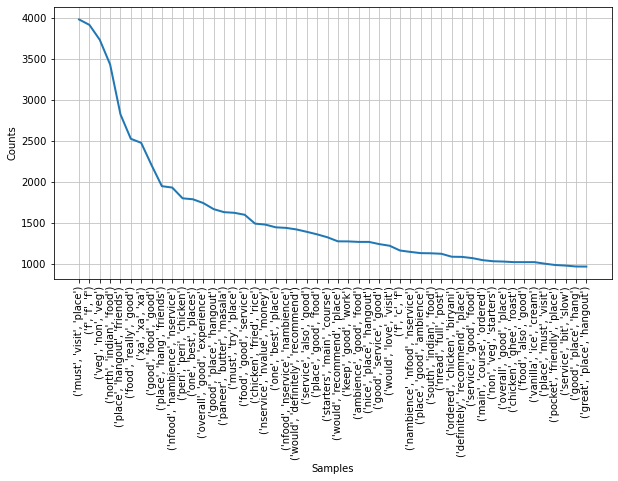

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [199]:
plt.figure(figsize = (10, 5))
fd_trigrams.plot(50)

Observations
There appears to be some bad data (strings of "f f f") somewhere in the reviews, but we'll ignore that. The specific food preferences we can see here are north Indian Food, paneer butter masala, chicken fried rice, chicken ghee roast etc. Bangalore is full of chicken lovers...
[ ]


In [200]:
newdata.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city),rating
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('rated 5.0', ""rated\n had an egg chicken ro...",[],Delivery,Bellandur,1
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('rated 4.0', 'rated\n this little cafe is s...",[],Delivery,BTM,1
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('rated 4.0', 'rated\n this little cafe is s...",[],Dine-out,BTM,1
3,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('rated 5.0', ""rated\n great service and don...",[],Buffet,Electronic City,NaN
4,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('rated 5.0', ""rated\n great service and don...",[],Delivery,Electronic City,NaN


## Analysing your cuisines

In [201]:
# Creating a new dataset with cuisines info and restaurant ratings
cuisines = newdata[["cuisines", "rating"]]

In [202]:
cuisines.isnull().sum()

cuisines      23
rating      4524
dtype: int64

In [203]:
cuisines.dropna(inplace=True)

In [204]:
# Converting to lowercase
cuisines["cuisines"] = cuisines["cuisines"].apply(lambda x: x.lower())

# Tokenizing the cuisines
cuisines_tokens = cuisines["cuisines"].apply(tokenizer.tokenize)

In [205]:
cuisines_tokens[0]

['fast', 'food']

In [206]:
type(cuisines_tokens[0])

list

In [208]:
type(cuisines_tokens)

pandas.core.series.Series

In [209]:
# Concatenating all the cuisine names into one text document
all_cuisines = cuisines_tokens.astype(str).str.cat()

In [210]:
type(all_cuisines)

str

In [211]:
all_cuisines[0:50]

"['fast', 'food']['fast', 'food', 'beverages']['fas"

In [212]:
cleaned_cuisines = tokenizer.tokenize(all_cuisines)

In [213]:
type(cleaned_cuisines)

list

In [214]:
# Generating cuisine frequencies 
fd_cuisine = FreqDist()
for cuisines in cleaned_cuisines:
    fd_cuisine[cuisines] += 1

# Printing the 50 most common cuisines (top 50)
print(fd_cuisine.most_common(5))

[('indian', 9622), ('north', 6941), ('chinese', 5143), ('food', 4239), ('south', 2650)]


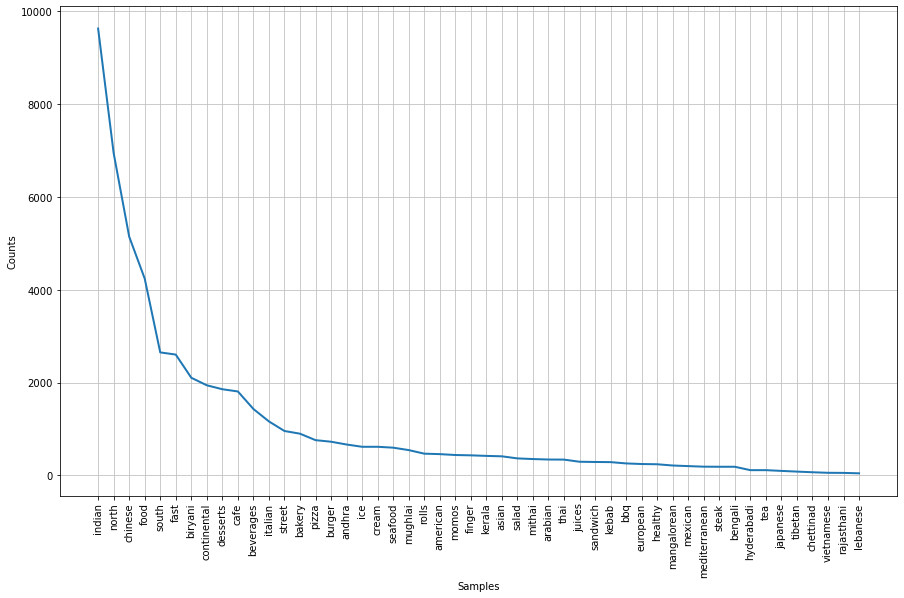

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [215]:
plt.figure(figsize=(15, 9))
fd_cuisine.plot(50)

### Now start applying algo but before that u have to pre-process your data

In [216]:
newdata.columns

Index(['name', 'address', 'listed_in(type)_x', 'url', 'online_order',
       'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)_y', 'listed_in(city)', 'rating'],
      dtype='object')

In [217]:
newdata.dtypes

name                             object
address                          object
listed_in(type)_x                object
url                              object
online_order                     object
book_table                       object
rate                             object
votes                             int64
phone                            object
location                         object
rest_type                        object
dish_liked                       object
cuisines                         object
approx_cost(for two people)      object
reviews_list                     object
menu_item                        object
listed_in(type)_y                object
listed_in(city)                  object
rating                         category
dtype: object

In [218]:
#### considering "reviews_list", "menu_item", "dish_liked", "cuisines", u can think for predicting rating
### so we can store  ("reviews_list", "menu_item", "dish_liked", "cuisines") in a single feature

In [220]:
# Converting all the text to strings
newdata[["reviews_list", "menu_item", "dish_liked", "cuisines"]] = newdata[["reviews_list", "menu_item", "dish_liked", "cuisines"]].astype("str")

# Combining all the text data into a single feature called "text"
newdata["text"] = newdata["reviews_list"] + " " + newdata["menu_item"] + " " + newdata["dish_liked"] + " " + newdata["cuisines"]

In [221]:
newdata.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city),rating,text
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,nan,Fast Food,200,"[('rated 5.0', ""rated\n had an egg chicken ro...",[],Delivery,Bellandur,1,"[('rated 5.0', ""rated\n had an egg chicken ro..."
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('rated 4.0', 'rated\n this little cafe is s...",[],Delivery,BTM,1,"[('rated 4.0', 'rated\n this little cafe is s..."
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('rated 4.0', 'rated\n this little cafe is s...",[],Dine-out,BTM,1,"[('rated 4.0', 'rated\n this little cafe is s..."
3,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,nan,"Continental, Chinese, Italian",700,"[('rated 5.0', ""rated\n great service and don...",[],Buffet,Electronic City,NaN,"[('rated 5.0', ""rated\n great service and don..."
4,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,nan,"Continental, Chinese, Italian",700,"[('rated 5.0', ""rated\n great service and don...",[],Delivery,Electronic City,NaN,"[('rated 5.0', ""rated\n great service and don..."


In [222]:
# Creating a new dataset with text and restaurant ratings
text_data = newdata[["text", "rating"]]

In [223]:
text_data.head()

,text,rating
0,"[('rated 5.0', ""rated\n had an egg chicken ro...",1
1,"[('rated 4.0', 'rated\n this little cafe is s...",1
2,"[('rated 4.0', 'rated\n this little cafe is s...",1
3,"[('rated 5.0', ""rated\n great service and don...",NaN
4,"[('rated 5.0', ""rated\n great service and don...",NaN


In [224]:
text_data['rating'].unique()

['1', NaN, '0', '2']
Categories (3, object): ['0' < '1' < '2']

In [225]:
from sklearn.preprocessing import LabelEncoder

In [226]:
le = LabelEncoder()

In [227]:
text_data.dropna(inplace=True)

In [228]:
text_data['rating']=le.fit_transform(text_data['rating'])

In [229]:
text_data['rating'].unique()

array([1, 0, 2])

In [230]:
text_data['rating'].dtype

dtype('int32')

    what all things, u have to apply on your text column, basically
    a.lowercase
    b.tokenization
    c.remove stopwords
    d.lemmatization

In [231]:
# Converting text to lowercase
text_data["text"] = text_data["text"].apply(lambda x: x.lower())

In [232]:
text_data.shape

(16391, 2)

In [234]:
df=text_data.sample(n=2000)

In [235]:
df.reset_index(inplace=True)

In [236]:
df.drop('index',axis=1,inplace=True)

In [237]:
df.head()

,text,rating
0,"[('rated 2.0', 'rated\n meghana foods!!! the ...",2
1,"[('rated 3.0', 'rated\n ordered brown rice ve...",1
2,"[('rated 1.0', 'rated\n one of the worst food...",1
3,"[('rated 1.0', 'rated\n order at your own ris...",1
4,[] [] nan north indian,0


In [238]:
df.isnull().sum()

text      0
rating    0
dtype: int64

In [239]:
df.shape

(2000, 2)

In [240]:
tokens = df["text"].apply(tokenizer.tokenize)

In [241]:
type(tokens)

pandas.core.series.Series

In [243]:
print(tokens[0])

['rated', 'rated', 'n', 'meghana', 'foods', 'the', 'name', 'itself', 'is', 'more', 'than', 'enough', 'to', 'get', 'you', 'drooling', 'over', 'their', 'biriyanis', 'they', 'have', 'always', 'been', 'spicy', 'and', 'nice', 'unfortunate', 'not', 'this', 'time', 'u', 'd', 'yes', 'i', 'had', 'a', 'bad', 'experience', 'in', 'meghana', 'foods', 'as', 'shocking', 'as', 'it', 'seems', 'it', 'was', 'bad', 'it', 'was', 'too', 'sweet', 'to', 'be', 'true', 'pun', 'intended', 'but', 'the', 'starter', 'was', 'amazing', 'my', 'review', 'nfood', 'for', 'the', 'before', 'taste', 'nservice', 'nambience', 'ncost', 'for', 'rated', 'rated', 'n', 'this', 'is', 'one', 'of', 'the', 'best', 'biryanis', 'i', 've', 'ever', 'had', 'the', 'meghana', 'special', 'while', 'chicken', 'is', 'still', 'brilliant', 'the', 'tandoori', 'chicken', 'is', 'also', 'pretty', 'great', 'looking', 'forward', 'to', 'trying', 'their', 'mutton', 'variants', 'rated', 'rated', 'n', 'service', 'is', 'too', 'slow', 'and', 'need', 'to', 'wa

In [244]:
len(tokens)

2000

In [245]:
# Removing stopwords 
tokens = tokens.apply(lambda x: [tokens for tokens in x if tokens not in stop])

In [246]:
from nltk.stem import WordNetLemmatizer

In [247]:
wl = WordNetLemmatizer()

In [248]:
print(tokens[0])

['meghana', 'foods', 'name', 'enough', 'get', 'drooling', 'biriyanis', 'always', 'spicy', 'nice', 'unfortunate', 'time', 'u', 'yes', 'bad', 'experience', 'meghana', 'foods', 'shocking', 'seems', 'bad', 'sweet', 'true', 'pun', 'intended', 'starter', 'amazing', 'review', 'nfood', 'taste', 'nservice', 'nambience', 'ncost', 'one', 'best', 'biryanis', 'ever', 'meghana', 'special', 'chicken', 'still', 'brilliant', 'tandoori', 'chicken', 'also', 'pretty', 'great', 'looking', 'forward', 'trying', 'mutton', 'variants', 'service', 'slow', 'need', 'wait', 'hour', 'min', 'food', 'even', 'take', 'reservations', 'properly', 'biryani', 'good', 'compared', 'paradise', 'biryani', 'terms', 'veg', 'biryani', 'one', 'best', 'briyani', 'end', 'ni', 'special', 'chicken', 'briyani', 'mutton', 'keema', 'briyani', 'meghanabiryani', 'andhra', 'style', 'restuarant', 'serving', 'delicious', 'nonveg', 'dishes', 'bengaluru', 'briyani', 'tasty', 'taste', 'clearly', 'showed', 'used', 'natural', 'spices', 'briyani', '

In [249]:
data = tokens[0]

In [252]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [253]:
print([wl.lemmatize(word) for word in data])

['meghana', 'food', 'name', 'enough', 'get', 'drooling', 'biriyanis', 'always', 'spicy', 'nice', 'unfortunate', 'time', 'u', 'yes', 'bad', 'experience', 'meghana', 'food', 'shocking', 'seems', 'bad', 'sweet', 'true', 'pun', 'intended', 'starter', 'amazing', 'review', 'nfood', 'taste', 'nservice', 'nambience', 'ncost', 'one', 'best', 'biryani', 'ever', 'meghana', 'special', 'chicken', 'still', 'brilliant', 'tandoori', 'chicken', 'also', 'pretty', 'great', 'looking', 'forward', 'trying', 'mutton', 'variant', 'service', 'slow', 'need', 'wait', 'hour', 'min', 'food', 'even', 'take', 'reservation', 'properly', 'biryani', 'good', 'compared', 'paradise', 'biryani', 'term', 'veg', 'biryani', 'one', 'best', 'briyani', 'end', 'ni', 'special', 'chicken', 'briyani', 'mutton', 'keema', 'briyani', 'meghanabiryani', 'andhra', 'style', 'restuarant', 'serving', 'delicious', 'nonveg', 'dish', 'bengaluru', 'briyani', 'tasty', 'taste', 'clearly', 'showed', 'used', 'natural', 'spice', 'briyani', 'noverall'

In [254]:
df['rating'].unique()

array([2, 1, 0])

In [255]:
df['rating'].dtype

dtype('int32')

In [256]:
df['rating'].value_counts()

1    1383
0     372
2     245
Name: rating, dtype: int64

In [257]:
# Writing a function to lemmatize words

def lem(text):
    return [wl.lemmatize(word) for word in text]

In [258]:
# Applying the function to each row of the text
# i.e. reducing each word to its lemma

tokens_new = tokens.apply(lem)

In [259]:
type(tokens_new)

pandas.core.series.Series

In [260]:
tokens_new.head()

0    [meghana, food, name, enough, get, drooling, b...
1    [ordered, brown, rice, veg, biryani, outlet, b...
2    [one, worst, food, ordered, briyani, delivered...
3    [order, risk, might, assume, delicious, dish, ...
4                                      [north, indian]
Name: text, dtype: object

In [261]:
from sklearn.preprocessing import LabelEncoder

In [262]:
le = LabelEncoder()

In [263]:
df['rating'] = le.fit_transform(df['rating'])

In [264]:
print(tokens_new[0])

['meghana', 'food', 'name', 'enough', 'get', 'drooling', 'biriyanis', 'always', 'spicy', 'nice', 'unfortunate', 'time', 'u', 'yes', 'bad', 'experience', 'meghana', 'food', 'shocking', 'seems', 'bad', 'sweet', 'true', 'pun', 'intended', 'starter', 'amazing', 'review', 'nfood', 'taste', 'nservice', 'nambience', 'ncost', 'one', 'best', 'biryani', 'ever', 'meghana', 'special', 'chicken', 'still', 'brilliant', 'tandoori', 'chicken', 'also', 'pretty', 'great', 'looking', 'forward', 'trying', 'mutton', 'variant', 'service', 'slow', 'need', 'wait', 'hour', 'min', 'food', 'even', 'take', 'reservation', 'properly', 'biryani', 'good', 'compared', 'paradise', 'biryani', 'term', 'veg', 'biryani', 'one', 'best', 'briyani', 'end', 'ni', 'special', 'chicken', 'briyani', 'mutton', 'keema', 'briyani', 'meghanabiryani', 'andhra', 'style', 'restuarant', 'serving', 'delicious', 'nonveg', 'dish', 'bengaluru', 'briyani', 'tasty', 'taste', 'clearly', 'showed', 'used', 'natural', 'spice', 'briyani', 'noverall'

In [265]:
' '.join(tokens_new[0])

'meghana food name enough get drooling biriyanis always spicy nice unfortunate time u yes bad experience meghana food shocking seems bad sweet true pun intended starter amazing review nfood taste nservice nambience ncost one best biryani ever meghana special chicken still brilliant tandoori chicken also pretty great looking forward trying mutton variant service slow need wait hour min food even take reservation properly biryani good compared paradise biryani term veg biryani one best briyani end ni special chicken briyani mutton keema briyani meghanabiryani andhra style restuarant serving delicious nonveg dish bengaluru briyani tasty taste clearly showed used natural spice briyani noverall great experience meghanas restuarant would rate food foodtalkindia indianfoodie foodtravelers foodphoto foodtalkindia foodindia foodphotographer foodpics till best biriyani tasted nmeghan chicken boneless biriyani die nmeghan maintained ter taste yes visiting place bored food npanner biriyani resembl

In [266]:
tokens_new.index

RangeIndex(start=0, stop=2000, step=1)

In [267]:
## collect entire data into corpus as we have to NLP techniques to this corpus to convert it into some vectors

corpus=[]

for i in tokens_new.index:
    review=' '.join(tokens_new[i])
    corpus.append(review)

In [273]:
# Creating the TF_IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [274]:
X.shape

(2000, 25471)

# Splitting the data into train and test sets (stratified)

In [275]:
from sklearn.model_selection import train_test_split

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, df['rating'], test_size= 0.3, random_state= 0,stratify=df['rating'])

In [277]:
from sklearn.linear_model import LogisticRegression

In [278]:
lr=LogisticRegression(multi_class='multinomial')

In [279]:
lr.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [280]:
# Make predictions.
predictions =lr.predict(X_test)

In [281]:
# Compute the error.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predictions, y_test))

[[ 13  13   0]
 [ 98 395  43]
 [  1   7  30]]


In [282]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions,y_test))
print('\n')

0.73




In [283]:
#fit naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [284]:
### classifier models
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest',RandomForestClassifier()))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [285]:
# Make predictions on validation dataset

for name, model in models:
    print(name)
    model.fit(X_train, y_train)

    #Make prediction.
    predictions = model.predict(X_test)

    # Compute the error
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[ 13  13   0]
 [ 98 395  43]
 [  1   7  30]]
0.73


Naive Bayes
[[ 34  53   1]
 [ 67 291  38]
 [ 11  71  34]]
0.5983333333333334


RandomForest
[[  8   0   0]
 [104 411  47]
 [  0   4  26]]
0.7416666666666667


Decision Tree
[[ 46  66   4]
 [ 64 320  39]
 [  2  29  30]]
0.66


KNN
[[ 32  56   1]
 [ 68 305  28]
 [ 12  54  44]]
0.635




In [286]:
### cross validating my Logistic Regression model

In [287]:
from sklearn.model_selection import cross_val_score

In [288]:
lr = LogisticRegression()
print(cross_val_score(lr, X, df['rating'], cv=5, scoring='accuracy').mean())

0.7435
